## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 3
## Linear and MultiLinear Regression

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [181]:
df = pd.read_csv("../data/Bias_correction_ucl.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [182]:
print(df.shape)

(7752, 25)


In [183]:
def removeOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_low = Q1 - 1.5*IQR
    df_hi = Q3 + 1.5*IQR
    new_df = df[(df[col] < df_hi) & (df[col] > df_low)].reset_index(drop=True)
    return new_df

df = removeOutliers(df,'Present_Tmax')
df = removeOutliers(df,'Next_Tmax')

In [184]:
df.dropna()
print(df.shape)

(7623, 25)


In [185]:
x = df[['Present_Tmax']]
y = df[['Next_Tmax']]

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [187]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5336, 1) (2287, 1) (5336, 1) (2287, 1)


In [188]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [189]:
print(reg.coef_)
print(reg.intercept_)

[[0.62665851]]
[11.70113623]


In [190]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_range)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


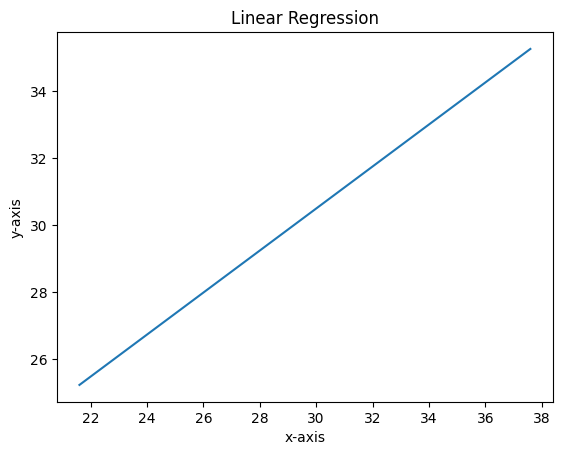

In [191]:
#plt.scatter(x, y)
# not showing cause too many points
plt.plot(x_range, y_pred)

plt.title("Linear Regression")
plt.ylabel("y-axis")
plt.xlabel("x-axis")

plt.show()

In [192]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print(mse)
print(r)

6.19980213400683
0.3530282602828495


In [193]:
df['Present_Tmax'].corr(df['Next_Tmax'])

0.6022765149740237

In [194]:
del df['Date']

In [195]:
df.shape

(7623, 24)

In [196]:
for col in df.columns:
    if col not in ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']:
        df = removeOutliers(df,col)

In [197]:
df.dropna()
print(df.shape)

(5549, 24)


In [198]:
x1 = df.values
y1 = df[['Next_Tmax']]

In [199]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [200]:
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(3884, 24) (1665, 24) (3884, 1) (1665, 1)


In [201]:
reg1 = LinearRegression()
reg1.fit(x1_train, y1_train)

LinearRegression()

In [202]:
print(reg1.coef_)
print(reg1.intercept_)

[[-1.07209792e-16 -1.83533744e-15 -5.38622635e-16  3.46063618e-16
  -1.51473396e-15 -1.40551481e-15 -3.63870210e-16  1.05932767e-15
   1.10315562e-16  2.30991898e-15  1.50648381e-15 -2.60578096e-16
   2.41783564e-15  1.44230075e-16 -1.31986972e-16 -2.38388256e-16
  -2.64240288e-16 -2.04192255e-15  2.23063904e-15  2.37934196e-17
  -2.11335296e-16 -2.05000910e-17  1.00000000e+00 -2.88981467e-16]]
[8.52651283e-14]


In [203]:
# sns.pairplot(df)
#taking to long to show

In [204]:
y1_pred = reg1.predict(x1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
r1 = r2_score(y1_test, y1_pred)
print(mse1)
print(r1)

3.9354162194492357e-28
1.0
